# Part 1 Лінійне програмування


In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import linprog
%matplotlib inline
rcParams["figure.figsize"]=(18,5)

**На 2 тони врожаю потрібно залучити 1 працівника. Тобто якщо у forecast на певний місяць в нас 100 тон врожаю - нам потрібно залучити 50 працівників.**


[155, 143, 130, 118, 113, 121, 126, 133, 132, 150, 152, 155]


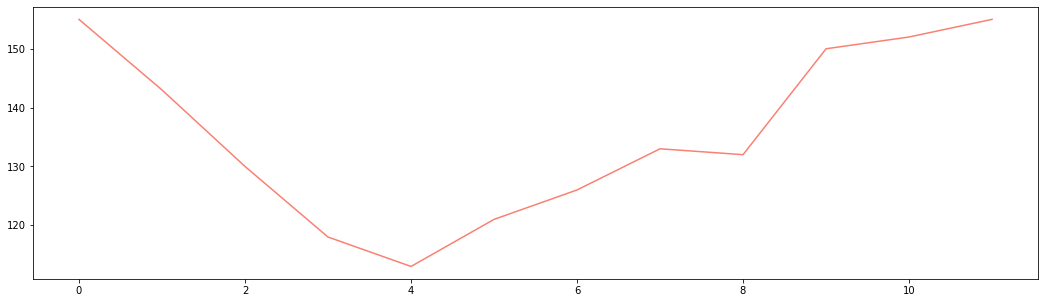

In [2]:
# Planing horizont
h = 12
# Prediction
forecast = [309.191369, 284.903280, 259.736828, 234.424177, 224.386887, 241.511760, 
            250.088411, 265.726641, 262.606300, 298.074115, 302.367941, 308.476907]

# amount of workers for the specific month
# round to bigger
goal = [math.ceil(i / 2) for i in forecast] 

print(goal)
plt.plot(goal, color='salmon')

**Працівників можна наймати, використовуючи 4 типи контрактів:**
* **3 місячний термін, страховий збір 300 у.о. на початку, мзп 1000 у.о.**
* **4 місячний термін, щомісячний страховий збір 110 у.о., мзп 900 у.о.**
* **7 місячний термін, щомісячний страховий збір 110 у.о. перші 3 місяці і 90 у.о. наступні 4 місяці, бонус по завершенні контракту 100 у.о і мзп 850 у.о.**
* **5 місячний термін, початковий бонус 450 у.о., мзп 950 у.о.**


In [3]:
# Workers information
avail_workers = [3, 4, 7, 5]

In [4]:
###### COSTS  ########
rho = -0.005
mzp = [1000, 900, 850, 950]
bonus = [0, 0, 100, 450]
insurance_fee = [300, (4*110), (3*110 + 4*90), 0] 

cost = []
index = 0
for worker in avail_workers:
    temp_cost = 0
    for p in range(worker):
        temp_cost +=  np.exp(rho * p) * mzp[index]
    temp_cost += np.exp(rho * p) * bonus[index]
    temp_cost += np.exp(rho * p) * insurance_fee[index]
    cost.append(temp_cost)
    index += 1
cost

[3282.077263066601, 4006.6060807157696, 6628.361087217554, 5143.943682547125]

In [5]:
# Objective function
vec_min = np.array([i for i in cost for _ in range(h)])
vec_min

array([3282.07726307, 3282.07726307, 3282.07726307, 3282.07726307,
       3282.07726307, 3282.07726307, 3282.07726307, 3282.07726307,
       3282.07726307, 3282.07726307, 3282.07726307, 3282.07726307,
       4006.60608072, 4006.60608072, 4006.60608072, 4006.60608072,
       4006.60608072, 4006.60608072, 4006.60608072, 4006.60608072,
       4006.60608072, 4006.60608072, 4006.60608072, 4006.60608072,
       6628.36108722, 6628.36108722, 6628.36108722, 6628.36108722,
       6628.36108722, 6628.36108722, 6628.36108722, 6628.36108722,
       6628.36108722, 6628.36108722, 6628.36108722, 6628.36108722,
       5143.94368255, 5143.94368255, 5143.94368255, 5143.94368255,
       5143.94368255, 5143.94368255, 5143.94368255, 5143.94368255,
       5143.94368255, 5143.94368255, 5143.94368255, 5143.94368255])

In [6]:
print(len(vec_min))

48


In [7]:
# Constraint matrix rows: h (1 year in our case), cols: len(avail_workers) * h (4 * 1 year)
A_full = np.empty((h, h * len(avail_workers)), dtype=np.int64)
for n, m in enumerate(avail_workers):
    A_temp = np.zeros((h, h), dtype=np.int64)
    for i in range(h):
        for j in range(max(0, i-m+1), min(i+1, h)):
            A_temp[i, j] = 1
    A_full[:, h * n: h * (n+1)] = A_temp
A_con = A_full[:h, :]

In [8]:
pd.DataFrame(A_con)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
6,0,0,0,0,1,1,1,0,0,0,...,1,1,1,1,1,0,0,0,0,0
7,0,0,0,0,0,1,1,1,0,0,...,0,1,1,1,1,1,0,0,0,0
8,0,0,0,0,0,0,1,1,1,0,...,0,0,1,1,1,1,1,0,0,0
9,0,0,0,0,0,0,0,1,1,1,...,0,0,0,1,1,1,1,1,0,0


In [9]:
#### Optimizer
c = vec_min
b = - np.array(goal) 
A = - A_con

res = linprog(c, A, b, method='simplex')
print(res)

     con: array([], dtype=float64)
     fun: 1665324.2796688867
 message: 'Optimization terminated successfully.'
     nit: 16
   slack: array([ 0., 12., 25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
  status: 0
 success: True
       x: array([ 37.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,  23.,   2.,
         3.,   6.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 120.,   0.,   0.,   0.,
         0.,   0.,   0., 112.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,
         0.,   0.,   0.,   0.])


In [10]:
opt = np.asmatrix(np.ceil(res.x))
plan = opt.reshape((len(avail_workers), -1)).transpose()
result = np.asmatrix(A_con) * np.asmatrix(opt).transpose()
print(plan)
print(result)

[[ 37.   6.   0. 112.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   1.   0.   0.]
 [  0.   0. 120.   0.]
 [  5.   0.   0.   0.]
 [  0.   0.   0.   7.]
 [  0.   0.   0.   0.]
 [ 23.   0.   0.   0.]
 [  2.   0.   0.   0.]
 [  3.   0.   0.   0.]]
[[155.]
 [155.]
 [155.]
 [118.]
 [113.]
 [121.]
 [126.]
 [133.]
 [132.]
 [150.]
 [152.]
 [155.]]


In [11]:
goal

[155, 143, 130, 118, 113, 121, 126, 133, 132, 150, 152, 155]

**We have too many workers for the 2nd and 3rd monthes, I gess it's because we need to hire 155 workers for the first month and they will be still hired at least 2 more monthes. So only after 3rd month we'll get nice results.**

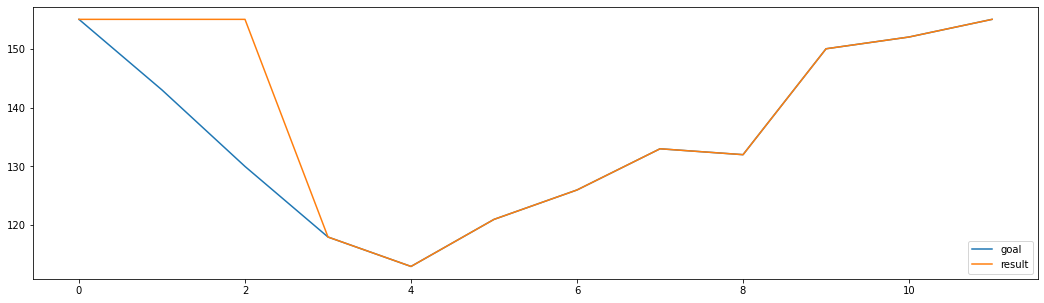

In [12]:
plt.plot(goal, label="goal")
plt.plot(result, label="result")
plt.legend(loc='lower right')

# Part 2 Нелінійне програмування

**На основі одержаного прогнозу, побудувати задачу максимізації грос профіту, використовуючи функцію еластичності та витрати по збереженню товарів на складі з ноутбука pricing.**

In [13]:
from scipy.optimize import minimize

np.random.seed(1729)
plt.rcParams['figure.figsize'] = 15, 8

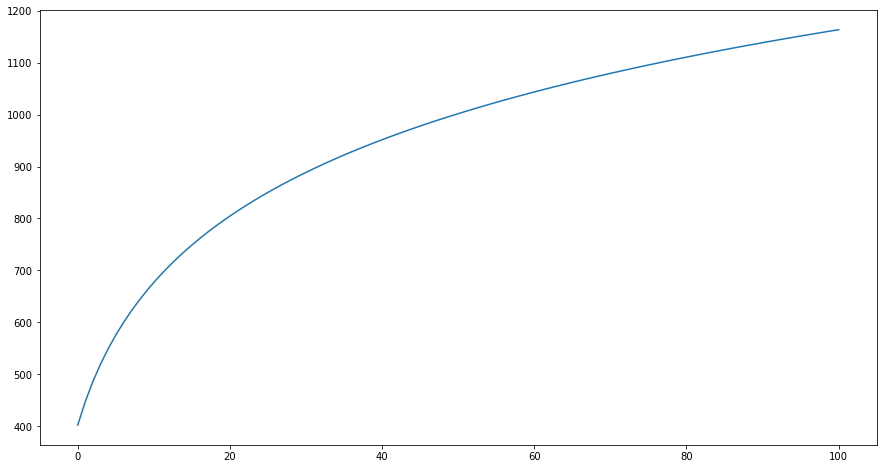

In [14]:
def inventory(x):
    a = 0.2
    return 250 * np.log(x + 5)
inv_level = np.linspace(0, 100, 100)
plt.plot(inv_level, inventory(inv_level))

In [15]:
total_items = 100

In [16]:
print(inventory(0))
print(inventory(total_items))

402.3594781085251
1163.4900875393807


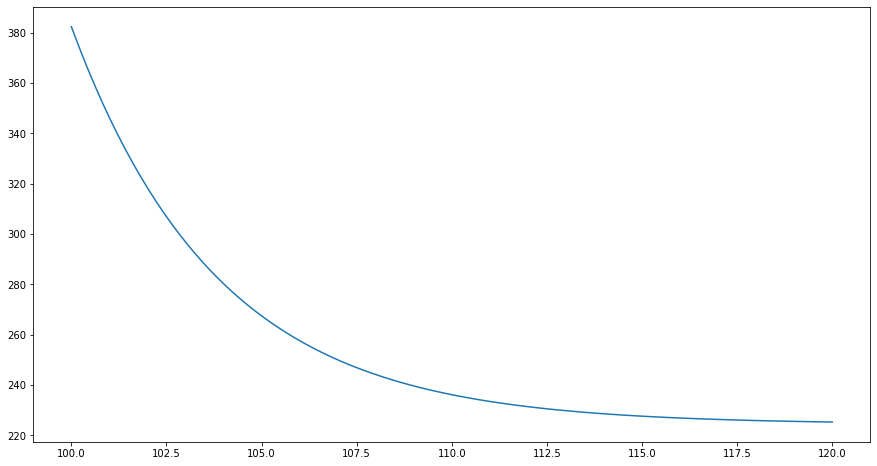

In [17]:
a = 224.386887 #min forecast
b = 309.191369 #max forecast

def elasticity_func(x):
    return b * np.exp(-0.26 * x) * 1e11 + a

pricing_level = np.linspace(100, 120, 100)
plt.plot(pricing_level, elasticity_func(pricing_level))

In [18]:
min_price = 100
max_price = 120

In [19]:
print(elasticity_func(min_price))
print(elasticity_func(max_price))

382.3555100929779
225.25833108575128


In [20]:
def obj(x):
    forecast = [309.191369, 284.903280, 259.736828, 234.424177, 224.386887, 241.511760, 
                250.088411, 265.726641, 262.606300, 298.074115, 302.367941, 308.476907]
    m = 12
    income = np.sum(x)  

    for i in range(m):
        sold_production = elasticity_func(x[i])
        
        if (sold_production < forecast[i]):  # and if bigger - it's not optimal
            to_inventory = forecast[i] - sold_production 
            income -= inventory(to_inventory)
            
            if i != (m-1):  # sold it next month
                forecast[i+1] += to_inventory
    return -income

In [21]:
### inventory can hold only 100 units of production ###
def constraint(x):
    total_items = 100
    forecast = [309.191369, 284.903280, 259.736828, 234.424177, 224.386887, 241.511760, 
                250.088411, 265.726641, 262.606300, 298.074115, 302.367941, 308.476907]
    m = 12
    
    to_inventory = 0
    for i in range(m):
        sold_production = elasticity_func(x[i])
        
        if (sold_production < forecast[i]):
            to_inventory = forecast[i] - sold_production 
            
            if i != (m-1):  # sold it next month
                forecast[i+1] += to_inventory
                
            if to_inventory > total_items:
                return total_items - to_inventory
    return 0


con = {'type': 'ineq', 'fun': constraint}

In [22]:
### bounds for price [100, 120] ###
m = 12
bnds = [(min_price, max_price) for _ in range(m)]
bnds

[(100, 120),
 (100, 120),
 (100, 120),
 (100, 120),
 (100, 120),
 (100, 120),
 (100, 120),
 (100, 120),
 (100, 120),
 (100, 120),
 (100, 120),
 (100, 120)]

In [23]:
x0 = 110. * np.ones(m)

In [24]:
solution = minimize(obj, x0, method='SLSQP', bounds=bnds, constraints=con, tol=0.01, options={"maxiter":10000, 'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1237.4679064537515
            Iterations: 15
            Function evaluations: 203
            Gradient evaluations: 14


In [25]:
x = solution.x
x

array([101.7984944 , 103.67836274, 103.77218951, 103.85129137,
       103.93129245, 104.01814446, 104.10171009, 104.17781133,
       103.89395769, 102.0787716 , 102.07877268, 100.08710814])

In [26]:
# show final income
print('Final Income: ' + str(-obj(x)))

Final Income: 1237.4679064537515
